## A notebook to create a bar graph of CTs inside AS

## Install and import libraries

In [ ]:
%pip install pandas seaborn numpy requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import textwrap
import requests
from  io import StringIO

## Load data

In [ ]:
# Use new report: https://github.com/x-atlas-consortia/hra-pop/issues/125!!!!!!!!!!!
url = "https://grlc.io/api-git/hubmapconsortium/ccf-grlc/subdir/hra-pop/cell_types_in_anatomical_structurescts_per_as"


headers = {

  'Accept' :'text/csv'

  }


data = requests.get(url=url, headers=headers).text

df = pd.read_csv(StringIO(data))


df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-,SMC (PLPP2+),92.848,0.114140,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...,Cycling plasma cell,63.448,0.077998,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-,Mesoderm 1 (HAND1+),57.400,0.070563,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,53.928,0.066295,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_goblet-cell,Goblet cell,49.280,0.060581,3
...,...,...,...,...,...,...,...,...,...,...,...
7846,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1
7847,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell,CD8+ T Cell,3691.176,0.005951,1
7848,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
7849,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


## Global settings

In [ ]:
hra_pop_version = 'v0.11.1'

output_folder = 'output/ctBar3dAs'

# adjust vis
# plt.rcParams['figure.figsize'] = (10, 2.5)

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 20,    # Font size for plot titles
    "axes.labelsize": 13,    # Font size for x and y labels
    "xtick.labelsize": 12,   # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
    "legend.fontsize": 13,
    "legend.title_fontsize": 15
})

## Preprocess

In [ ]:
# walk up CTs
# Use new report: https://github.com/x-atlas-consortia/hra-pop/issues/125!!!!!!!!!!!

csv_response =requests.get('https://grlc.io/api-git/hubmapconsortium/ccf-grlc/subdir/hra-pop/cell-types-level-mapping', headers={'accept': 'text/csv'}).text

look_up = pd.read_csv(StringIO(csv_response))

look_up

,cell_label,cell_id,level_1_cell_id,level_1_cell_label
0,hematopoietic stem cell,http://purl.obolibrary.org/obo/CL_0000037,http://purl.obolibrary.org/obo/CL_0000034,stem cell
1,fibroblast,http://purl.obolibrary.org/obo/CL_0000057,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
2,epithelial cell,http://purl.obolibrary.org/obo/CL_0000066,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
3,blood vessel endothelial cell,http://purl.obolibrary.org/obo/CL_0000071,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4,mesothelial cell,http://purl.obolibrary.org/obo/CL_0000077,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
...,...,...,...,...
193,metallothionein-positive alveolar macrophage,http://purl.obolibrary.org/obo/CL_4033042,http://purl.obolibrary.org/obo/CL_0000235,macrophage
194,lung interstitial macrophage,http://purl.obolibrary.org/obo/CL_4033043,http://purl.obolibrary.org/obo/CL_0000235,macrophage
195,deuterosomal cell,http://purl.obolibrary.org/obo/CL_4033044,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
196,lung migratory dendritic cell,http://purl.obolibrary.org/obo/CL_4033045,http://purl.obolibrary.org/obo/CL_0000451,dendritic cell


In [ ]:
df_temp = df
df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-,SMC (PLPP2+),92.848,0.114140,3
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...,Cycling plasma cell,63.448,0.077998,3
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-,Mesoderm 1 (HAND1+),57.400,0.070563,3
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,53.928,0.066295,3
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_goblet-cell,Goblet cell,49.280,0.060581,3
...,...,...,...,...,...,...,...,...,...,...,...
7846,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1
7847,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell,CD8+ T Cell,3691.176,0.005951,1
7848,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1
7849,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1


In [ ]:
# Merge look-up df with df
df_temp = df.merge(
    look_up[['cell_id','level_1_cell_id','level_1_cell_label']],
    left_on='cell_id',  # Column in main df
    right_on='cell_id',  # Column in lookup df
    how='left'      # Keep all rows from main df
)

# handle missing values
df_temp['level_1_cell_id'] = df_temp['level_1_cell_id'].fillna('unknown cell')
df_temp['level_1_cell_label'] = df_temp['level_1_cell_label'].fillna('unknown cell')

df_temp

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-,SMC (PLPP2+),92.848,0.114140,3,unknown cell,unknown cell
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...,Cycling plasma cell,63.448,0.077998,3,unknown cell,unknown cell
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-,Mesoderm 1 (HAND1+),57.400,0.070563,3,unknown cell,unknown cell
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,53.928,0.066295,3,unknown cell,unknown cell
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_goblet-cell,Goblet cell,49.280,0.060581,3,unknown cell,unknown cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1,unknown cell,unknown cell
7907,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell,CD8+ T Cell,3691.176,0.005951,1,unknown cell,unknown cell
7908,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,unknown cell,unknown cell
7909,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,unknown cell,unknown cell


In [ ]:
df = df_temp

df

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
0,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_smc-plpp2-,SMC (PLPP2+),92.848,0.114140,3,unknown cell,unknown cell
1,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_cycling-plasma...,Cycling plasma cell,63.448,0.077998,3,unknown cell,unknown cell
2,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_mesoderm-1-hand1-,Mesoderm 1 (HAND1+),57.400,0.070563,3,unknown cell,unknown cell
3,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_colonocyte,Colonocyte,53.928,0.066295,3,unknown cell,unknown cell
4,large intestine,http://purl.obolibrary.org/obo/UBERON_0001153,caecum,Female,celltypist,sc_transcriptomics,https://purl.org/ccf/ASCTB-TEMP_goblet-cell,Goblet cell,49.280,0.060581,3,unknown cell,unknown cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7906,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_mast-cell,Mast Cell,15322.464,0.024702,1,unknown cell,unknown cell
7907,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_cd8-t-cell,CD8+ T Cell,3691.176,0.005951,1,unknown cell,unknown cell
7908,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_lymphatic-endo...,Lymphatic Endothelial (and some immune cells),1753.956,0.002828,1,unknown cell,unknown cell
7909,lung,http://purl.org/sig/ont/fma/fma7508,Left posterior basal segmental bronchus,Male,sc_proteomics,sc_proteomics,https://purl.org/ccf/ASCTB-TEMP_basal-epitheli...,Basal Epithelial Cell,970.104,0.001564,1,unknown cell,unknown cell


In [ ]:
# filter by tool (azimuth, then celltypist, then popv)
# Function to determine if a row should be kept based on conditions
def filter_rows(df):
    # Step 1: Group by `sex`, `as_label`, and `modality`
    groups = df.groupby(['organ','sex', 'as_label', 'modality'])

    # Step 2: Initialize a list to store the rows to keep
    rows_to_keep = []

    # Step 3: Loop through each group
    for _, group in groups:      
        # If 'azimuth' exists in the group, keep only those rows
        if 'azimuth' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'azimuth'])
        # If no 'azimuth' but 'cell_typist' exists, keep 'cell_typist'
        elif 'celltypist' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'celltypist'])
        # If neither 'azimuth' nor 'cell_typist' exist, keep 'popv'
        elif 'popv' in group['tool'].values:
            rows_to_keep.append(group[group['tool'] == 'popv'])

    # Combine all the rows to keep
    df_filtered = pd.concat(rows_to_keep)
    return df_filtered


# Apply the filtering function
no_proteomics = df[df['tool'] != 'sc_proteomics']
df_filtered = filter_rows(no_proteomics)

# Display the filtered DataFrame
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
2067,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030022,Medullary Fibroblast,1832.421,0.274784,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
2069,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,1146.533,0.171930,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
2071,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000692,Fibroblast,876.037,0.131368,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
2073,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000597,Papillary Tip Epithelial,749.843,0.112444,2,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
2075,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,315.994,0.047385,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,53.168,0.001612,4,http://purl.obolibrary.org/obo/CL_0000084,T cell
4271,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,52.639,0.001596,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4272,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,20.586,0.000624,4,http://purl.obolibrary.org/obo/CL_0000236,B cell
4273,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,10.935,0.000332,4,http://purl.obolibrary.org/obo/CL_0000084,T cell


In [ ]:
# get unique combinations of organ, sex, AS, tool, and modality
unique_combinations = df_filtered[['organ','sex', 'as_label','tool', 'modality']].drop_duplicates().reset_index().drop(columns=['index'])
unique_combinations

,organ,sex,as_label,tool,modality
0,Left kidney,Female,hilum of kidney,azimuth,sc_transcriptomics
1,Left kidney,Female,kidney capsule,azimuth,sc_transcriptomics
2,Left kidney,Female,outer cortex of kidney,azimuth,sc_transcriptomics
3,Left kidney,Female,renal column,azimuth,sc_transcriptomics
4,Left kidney,Female,renal papilla,azimuth,sc_transcriptomics
...,...,...,...,...,...
91,spleen,Male,diaphragmatic surface of spleen,popv,sc_transcriptomics
92,spleen,Male,hilum of spleen,popv,sc_transcriptomics
93,urinary bladder,Female,fundus of urinary bladder,popv,sc_transcriptomics
94,urinary bladder,Male,fundus of urinary bladder,popv,sc_transcriptomics


## Visualize (single vis)

In [ ]:
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label
2067,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030022,Medullary Fibroblast,1832.421,0.274784,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
2069,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,1146.533,0.171930,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
2071,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000692,Fibroblast,876.037,0.131368,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast
2073,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000597,Papillary Tip Epithelial,749.843,0.112444,2,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
2075,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,315.994,0.047385,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,53.168,0.001612,4,http://purl.obolibrary.org/obo/CL_0000084,T cell
4271,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,52.639,0.001596,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell
4272,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,20.586,0.000624,4,http://purl.obolibrary.org/obo/CL_0000236,B cell
4273,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,10.935,0.000332,4,http://purl.obolibrary.org/obo/CL_0000084,T cell


In [ ]:
df_filtered['organ_as_label'] = df_filtered['organ']+"-"+df_filtered['as_label']
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
2067,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030022,Medullary Fibroblast,1832.421,0.274784,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast,Left kidney-hilum of kidney
2069,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,1146.533,0.171930,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney-hilum of kidney
2071,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000692,Fibroblast,876.037,0.131368,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast,Left kidney-hilum of kidney
2073,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000597,Papillary Tip Epithelial,749.843,0.112444,2,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,Left kidney-hilum of kidney
2075,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,315.994,0.047385,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney-hilum of kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,53.168,0.001612,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder-trigone of urinary bladder
4271,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,52.639,0.001596,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,urinary bladder-trigone of urinary bladder
4272,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,20.586,0.000624,4,http://purl.obolibrary.org/obo/CL_0000236,B cell,urinary bladder-trigone of urinary bladder
4273,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,10.935,0.000332,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder-trigone of urinary bladder


In [ ]:
# read colors
# Read colors from text file - using a very distinct variable name
custom_palette = []
with open('data/colors.txt', 'r') as f:
    custom_palette = [line.strip() for line in f.readlines()]

# Print the colors to verify they loaded correctly
print("Loaded colors:", custom_palette)

Loaded colors: ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']


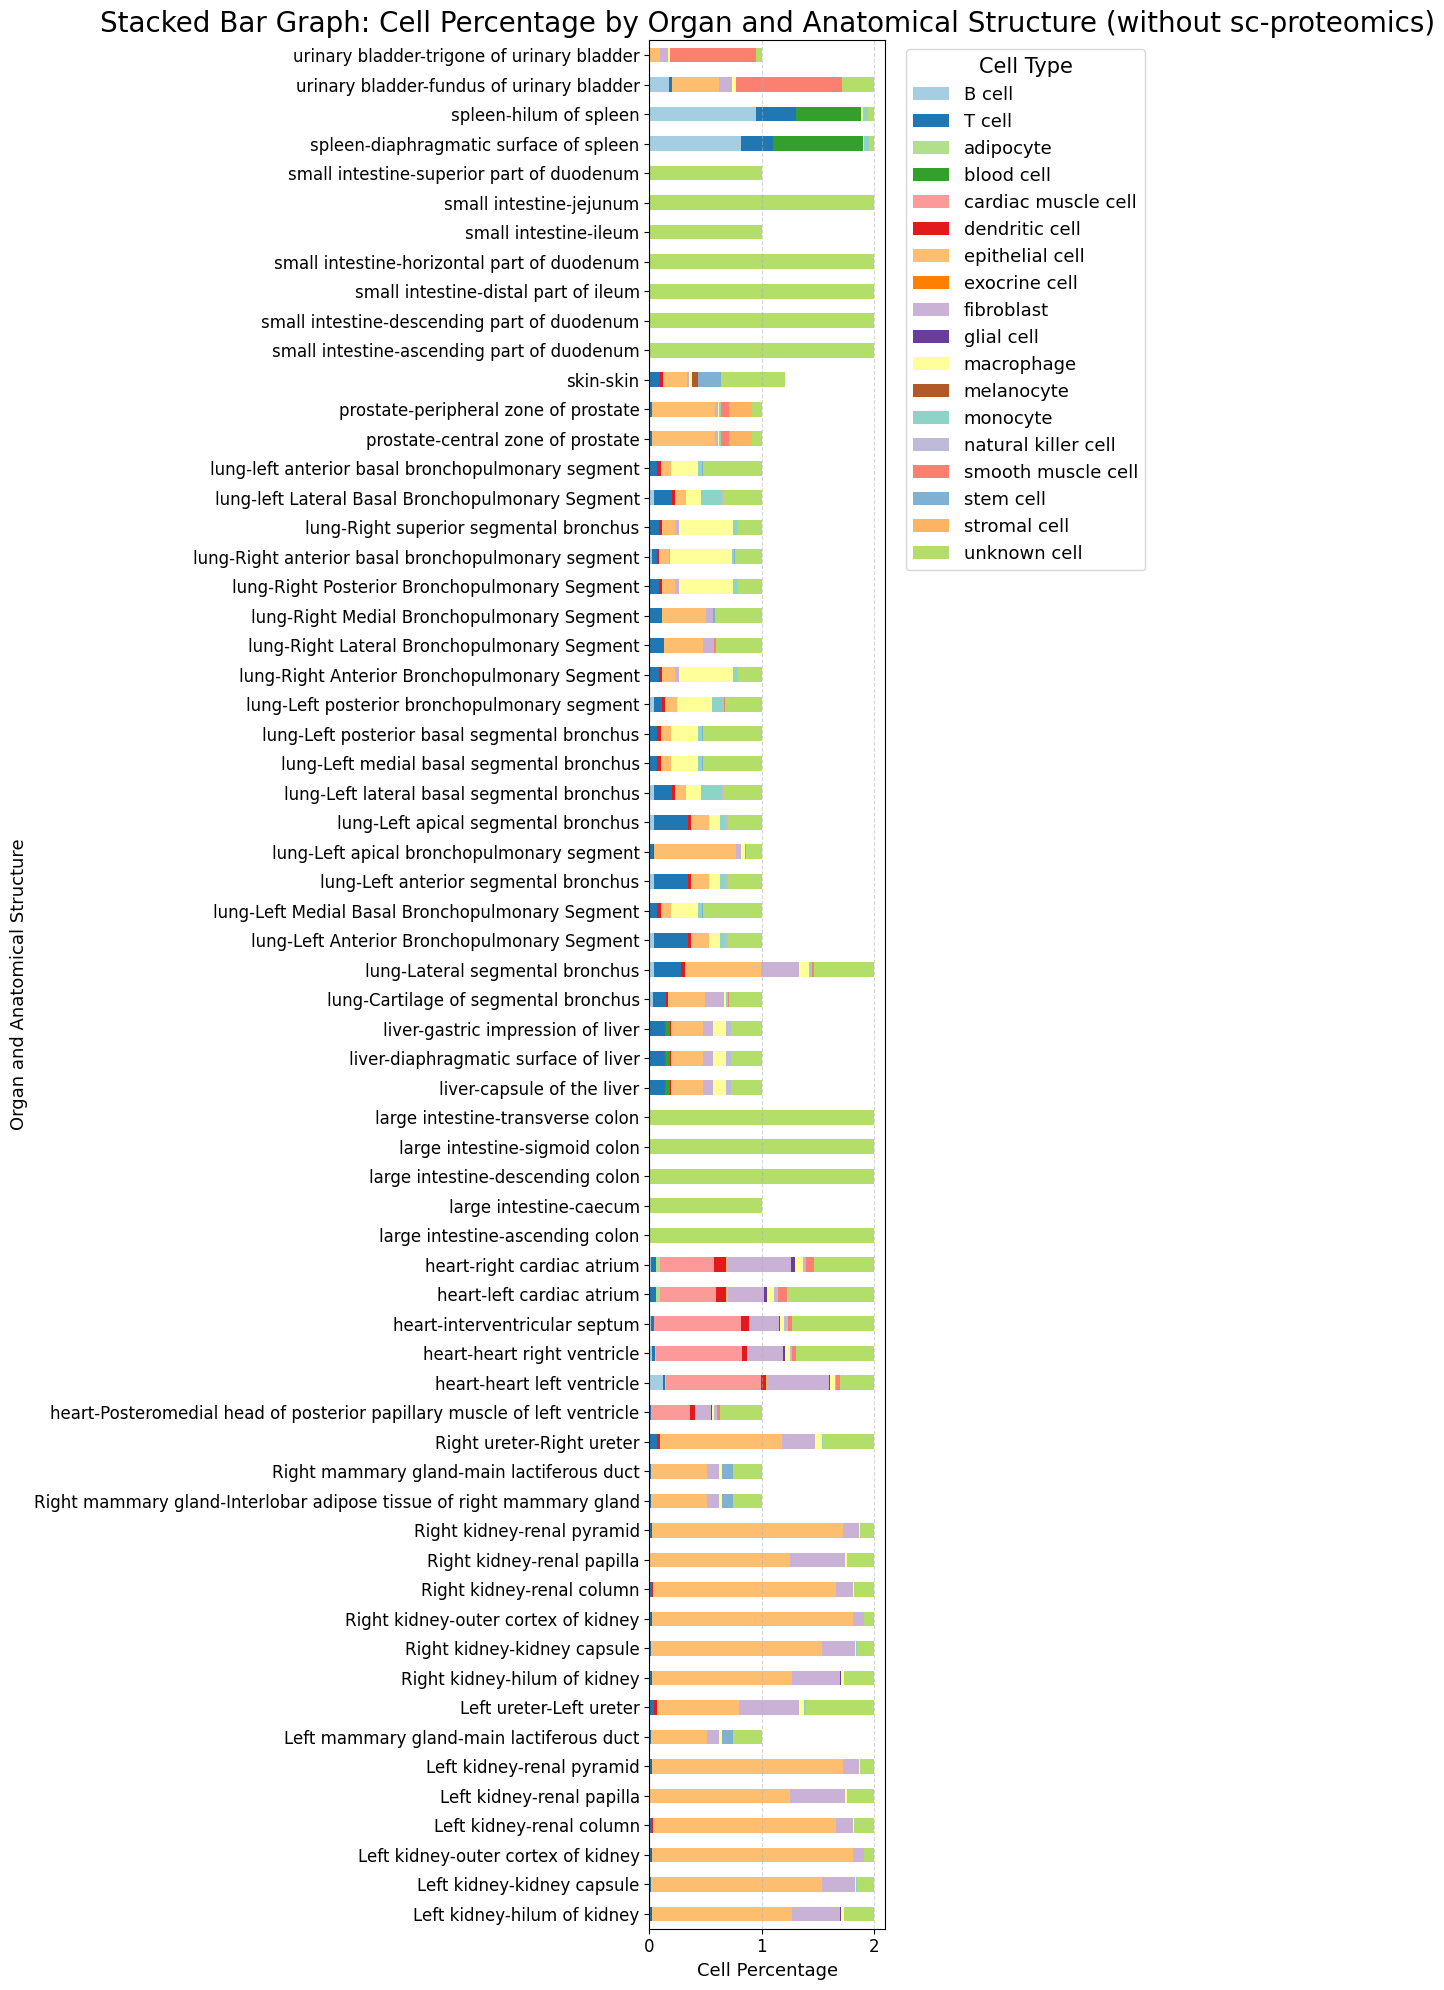

In [ ]:
# Group by as_label, level_1_cell_label, and tool, summing the cell percentages
grouped = df_filtered.groupby(['organ_as_label', 'level_1_cell_label'])['cell_percentage'].sum().reset_index()

# Combine level_1_cell_label and tool into one label for stacked bars
grouped['stack_label'] = grouped['level_1_cell_label'] 

# Pivot the data so each row is an as_label and each column is a stack_label
pivot_df = grouped.pivot(
    index='organ_as_label', columns='stack_label', values='cell_percentage').fillna(0)

# pivot_df = grouped.pivot(
#     index='organ_as_label', columns='stack_label', values='cell_percentage').fillna(0)

# Plot the stacked bar chart
ax = pivot_df.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 20),
    color=custom_palette  # Using the custom palette
)

# Styling the plot
# Remove legend if desired
ax.legend_.remove()


plt.xlabel("Cell Percentage")
plt.ylabel("Organ and Anatomical Structure")
plt.title("Stacked Bar Graph: Cell Percentage by Organ and Anatomical Structure (without sc-proteomics)")
plt.legend(title="Cell Type",bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Save the figure at 600 DPI
plt.savefig("stacked_bar_graph.png", dpi=600,
            format='png', bbox_inches='tight')

plt.show()

## Make look-up for `as_label` to `node_name`

In [ ]:
url = 'https://cdn.humanatlas.io/digital-objects/ref-organ/asct-b-3d-models-crosswalk/v1.7/assets/asct-b-3d-models-crosswalk.csv'
df_crosswalk = pd.read_csv(url, skiprows=10)
df_crosswalk

,anatomical_structure_of,source_spatial_entity,node_name,label,OntologyID,representation_of,node_type,glb file of single organs,Ref/1,Ref/1/ID
0,-,#VHFemaleOrgans,VH_F_integumentary_system,integumentary system layer,UBERON:0013754,http://purl.obolibrary.org/obo/UBERON_0013754,organizational,3d-vh-f-united,NaN,NaN
1,#VHFSkinV1.1,#VHFemaleOrgans,VH_F_skin,skin of body,UBERON:0002097,http://purl.obolibrary.org/obo/UBERON_0002097,mesh,3d-vh-f-skin,NaN,NaN
2,-,-,VH_F_mammary_gland,-,-,-,organizational,-,NaN,NaN
3,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_mammary_gland_L,Left mammary gland,FMA:57991,http://purl.org/sig/ont/fma/fma57991,organizational,3d-vh-f-mammary-gland-l,NaN,NaN
4,#VHFLeftMammaryGland,#VHFemaleOrgans,VH_F_fat_L,Interlobar adipose tissue of left mammary gland,FMA:73166,http://purl.org/sig/ont/fma/fma73166,mesh,3d-vh-f-mammary-gland-l,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2108,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_1,lumbar vertebra 1,UBERON:0004617,http://purl.obolibrary.org/obo/UBERON_0004617,mesh,VH_M_Vertebrae,NaN,NaN
2109,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_2,lumbar vertebra 2,UBERON:0004618,http://purl.obolibrary.org/obo/UBERON_0004618,mesh,VH_M_Vertebrae,NaN,NaN
2110,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_3,lumbar vertebra 3,UBERON:0004619,http://purl.obolibrary.org/obo/UBERON_0004619,mesh,VH_M_Vertebrae,NaN,NaN
2111,#VHMVertebrae,#VHMaleOrgans,VH_M_lumbar_vertebra_4,lumbar vertebra 4,UBERON:0004620,http://purl.obolibrary.org/obo/UBERON_0004620,mesh,VH_M_Vertebrae,NaN,NaN


In [ ]:
# only keep relevant rows
df_filtered

,organ,as,as_label,sex,tool,modality,cell_id,cell_label,cell_count,cell_percentage,dataset_count,level_1_cell_id,level_1_cell_label,organ_as_label
2067,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_4030022,Medullary Fibroblast,1832.421,0.274784,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast,Left kidney-hilum of kidney
2069,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000718,Inner Medullary Collecting Duct,1146.533,0.171930,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney-hilum of kidney
2071,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000692,Fibroblast,876.037,0.131368,2,http://purl.obolibrary.org/obo/CL_0000057,fibroblast,Left kidney-hilum of kidney
2073,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000597,Papillary Tip Epithelial,749.843,0.112444,2,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,Left kidney-hilum of kidney
2075,Left kidney,http://purl.obolibrary.org/obo/UBERON_0008716,hilum of kidney,Female,azimuth,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_1000768,Connecting Tubule,315.994,0.047385,2,http://purl.obolibrary.org/obo/CL_0000066,epithelial cell,Left kidney-hilum of kidney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000814,mature NK T cell,53.168,0.001612,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder-trigone of urinary bladder
4271,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0002138,endothelial cell of lymphatic vessel,52.639,0.001596,4,http://purl.obolibrary.org/obo/CL_0000000,unknown cell,urinary bladder-trigone of urinary bladder
4272,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000236,B cell,20.586,0.000624,4,http://purl.obolibrary.org/obo/CL_0000236,B cell,urinary bladder-trigone of urinary bladder
4273,urinary bladder,http://purl.obolibrary.org/obo/UBERON_0001257,trigone of urinary bladder,Male,popv,sc_transcriptomics,http://purl.obolibrary.org/obo/CL_0000084,T cell,10.935,0.000332,4,http://purl.obolibrary.org/obo/CL_0000084,T cell,urinary bladder-trigone of urinary bladder


In [ ]:
# export relevant columns
subset = df_crosswalk[['label', 'node_name', 'anatomical_structure_of']]
export = subset[subset['label'].isin(df_filtered['as_label'])]
export.to_csv('output/ctBar3dAs/crosswalk.csv', index=False)